<a href="https://colab.research.google.com/github/cathyai0320/A.I./blob/main/COMP262_FinalProject_Group3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from collections import Counter
import nltk
from nltk.corpus import stopwords

In [2]:
#read the dataset "Appliances_5.json" provided and load it into dataframe "df"
df = pd.read_json('Appliances_5.json', lines=True)

#print the shape of data
print(df.shape)

#print the top5 rows
df.head()

(2277, 12)


,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"08 22, 2013",A34A1UP40713F8,B00009W3I4,{'Style:': ' Dryer Vent'},James. Backus,I like this as a vent as well as something tha...,Great product,1377129600,NaN,NaN
1,5,True,"02 8, 2016",A1AHW6I678O6F2,B00009W3PA,{'Size:': ' 6-Foot'},kevin.,good item,Five Stars,1454889600,NaN,NaN
2,5,True,"08 5, 2015",A8R48NKTGCJDQ,B00009W3PA,{'Size:': ' 6-Foot'},CDBrannom,Fit my new LG dryer perfectly.,Five Stars,1438732800,NaN,NaN
3,5,True,"04 24, 2015",AR3OHHHW01A8E,B00009W3PA,{'Size:': ' 6-Foot'},Calvin E Reames,Good value for electric dryers,Perfect size,1429833600,NaN,NaN
4,5,True,"03 21, 2015",A2CIEGHZ7L1WWR,B00009W3PA,{'Size:': ' 6-Foot'},albert j. kong,Price and delivery was excellent.,Five Stars,1426896000,NaN,NaN


In [3]:
# a. Counts, averages
total_reviews = len(df)
total_products = df['asin'].nunique()
total_users = df['reviewerID'].nunique()
average_rating = df['overall'].mean()

print("Total Reviews:", total_reviews)
print("Total Products:", total_products)
print("Total Users:", total_users)
print("Average Rating:", average_rating)

Total Reviews: 2277
Total Products: 48
Total Users: 47
Average Rating: 4.499780412823891


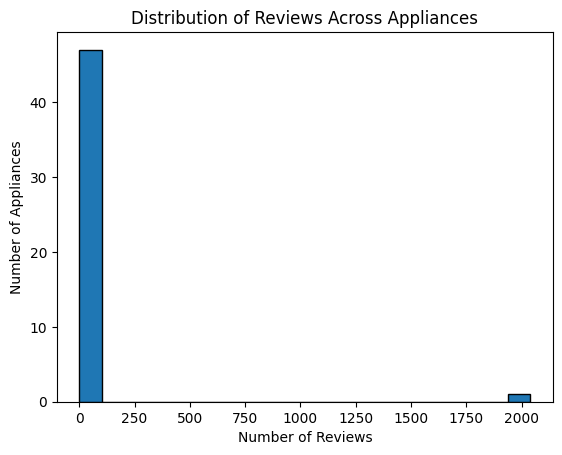

In [4]:
# b. Distribution of the number of reviews across products
reviews_per_product = df['asin'].value_counts()
reviews_per_product.plot(kind='hist', bins=20, edgecolor='black')
plt.title("Distribution of Reviews Across Appliances")
plt.xlabel("Number of Reviews")
plt.ylabel("Number of Appliances")
plt.show()

In [5]:
# c. Distribution of the number of reviews per product
average_reviews_per_product = total_reviews / total_products
print("Average Reviews per Product:", average_reviews_per_product)

# Count the number of reviews for each product
reviews_per_product = df['asin'].value_counts().reset_index()

# Rename columns for clarity
reviews_per_product.columns = ['Product_ID', 'Number_of_Reviews']

# Display the distribution of reviews across products
print("Distribution of the number of reviews across products:")
print(reviews_per_product)

Average Reviews per Product: 47.4375
Distribution of the number of reviews across products:
    Product_ID  Number_of_Reviews
0   B0006GVNOA               2040
1   B0014CN8Y8                 24
2   B00JGTUQJ6                 13
3   B0015UGPWQ                 12
4   B00CW0O1EW                  8
5   B0056I99WG                  8
6   B004XLDE5A                  8
7   B000XXWOGW                  8
8   B0053F80JA                  7
9   B000NCTOUM                  7
10  B000N6302Q                  7
11  B00P9C66PM                  7
12  B001DPFP88                  7
13  B00570RQ0A                  6
14  B00DM8J11Q                  6
15  B00MGMWTQS                  6
16  B001769IVI                  6
17  B001DHLGOS                  6
18  B00126NABC                  6
19  B004XLDDNI                  5
20  B00470A1S0                  5
21  B008YDSH6E                  5
22  B004XLDHSE                  5
23  B004UB1O9Q                  5
24  B00W4YKCGC                  5
25  B00009W3PA          

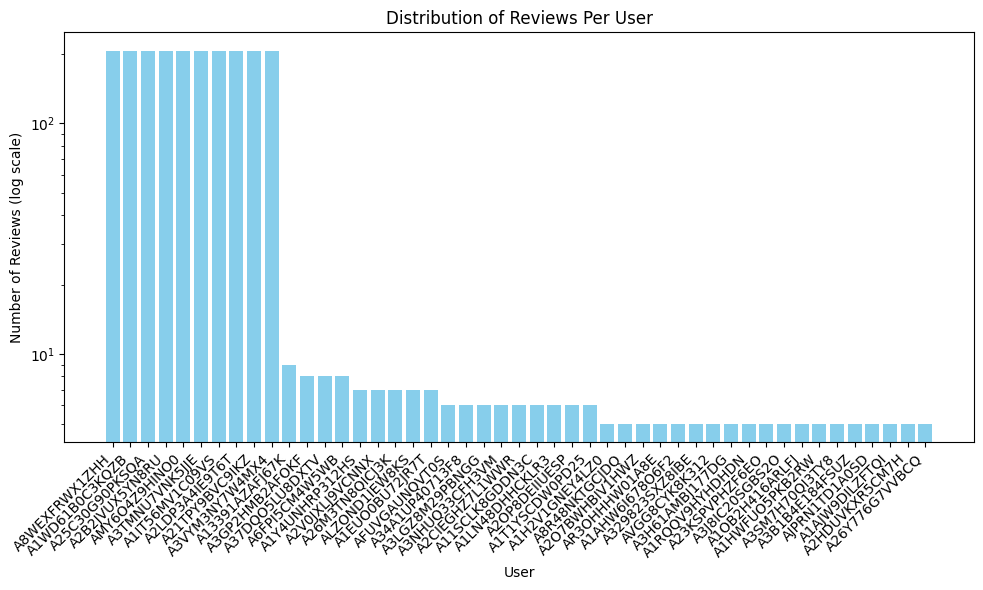

In [6]:
# d. Distribution of reviews per user
# Count the number of reviews for each user
reviews_per_user = df['reviewerID'].value_counts()

# Plot the distribution of reviews per user using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(reviews_per_user.index, reviews_per_user.values, color='skyblue')
plt.title('Distribution of Reviews Per User')
plt.xlabel('User')
plt.ylabel('Number of Reviews (log scale)')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [7]:
reviews_per_user = df['reviewerID'].value_counts()
print(reviews_per_user)

A8WEXFRWX1ZHH     206
A1WD61B0C3KQZB    206
A25C30G90PKSQA    206
A2B2JVUX5YN8RU    206
AMY6O4Z9HINO0     206
A3TMNU7VNK5JJE    206
A1IT56MV1C09VS    206
A2LDP3A4IE9T6T    206
A21TPY9BVC9IKZ    206
A3VYM3NY7W4MX4    206
A13391AZAFJ67K      9
A3GP2HMB2AFOKF      8
A37DQO5LU8DXTV      8
A6FPI5CM4W5WB       8
A1Y4UNHRP312HS      7
A2V0JXLJ9VCNNX      7
A26M3TN8QICJ3K      7
ALZOND1IEW8KS       7
A1EUO0BU72JR7T      7
AFUVGAUNQVT0S       6
A34A1UP40713F8      6
A3LGZ8M29PBNGG      6
A3NHUQ33CFH3VM      6
A2CIEGHZ7L1WWR      6
A11SCLK8GDDN3C      6
A1LN48DHHCKLR3      6
A2OP8DEIIUESP       6
A1T1YSCDW0PD25      6
A1H2V1GNEY4LZ0      5
A8R48NKTGCJDQ       5
A2O7BWHBIV1HWZ      5
AR3OHHHW01A8E       5
A1AHW6I678O6F2      5
A329823SXZ8IBE      5
AVGG8CYK8K312       5
A3H61AMBJ177DG      5
A1RQQV9HYHDHDN      5
A23KSPVPHZF6EO      5
A3J8IC20SGBS2O      5
A1OB2H416ARLFJ      5
A1HWFUO5PKB2RW      5
A3SM7H70QI3TY8      5
A3B1B4E184FSUZ      5
AJPRN1TD1A0SD       5
A1AJW9DILZFTQI      5
A2HDUVKXR5

In [8]:
# Review Lengths
df['review_length'] = df['reviewText'].apply(len)

# Analyzing Review Lengths
mean_length = df['review_length'].mean()
median_length = df['review_length'].median()
mode_length = df['review_length'].mode()[0]
std_dev_length = df['review_length'].std()

print("Mean Review Length:", mean_length)
print("Median Review Length:", median_length)
print("Mode Review Length:", mode_length)
print("Standard Deviation of Review Length:", std_dev_length)


Mean Review Length: 1481.9451032059728
Median Review Length: 1198.0
Mode Review Length: 888
Standard Deviation of Review Length: 848.2840163932843


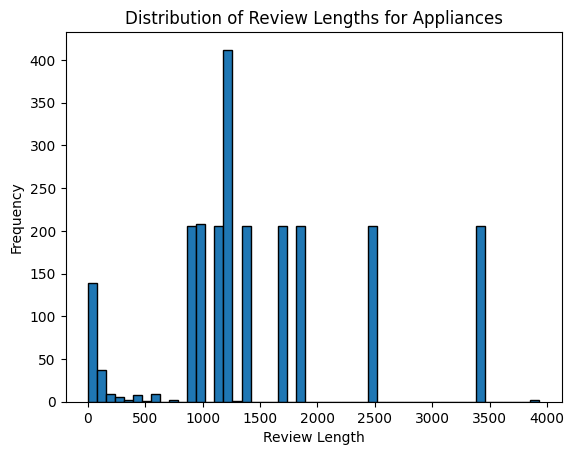

Number of Outliers: 208
Outlier Examples:
                                            reviewText  review_length
9    Be careful, NewAir will not stand by their pro...           3932
11   Be careful, NewAir will not stand by their pro...           3932
38   This review is for Gardus RLE202 LintEater 10-...           3421
77   This review is for Gardus RLE202 LintEater 10-...           3421
118  This review is for Gardus RLE202 LintEater 10-...           3421


In [9]:
# Review Lengths
df['review_length'] = df['reviewText'].apply(len)

# Analyzing Review Lengths
plt.hist(df['review_length'], bins=50, edgecolor='black')
plt.title("Distribution of Review Lengths for Appliances")
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.show()

# Identifying Outliers
Q1 = df['review_length'].quantile(0.25)
Q3 = df['review_length'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Define the upper and lower bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['review_length'] < lower_bound) | (df['review_length'] > upper_bound)]
print("Number of Outliers:", len(outliers))
print("Outlier Examples:")
print(outliers[['reviewText', 'review_length']].head())


In [10]:
# g. check duplicates
# Check for Duplicates
duplicates = df.duplicated(subset=['reviewText'])
num_duplicates = duplicates.sum()
print("Number of Duplicates:", num_duplicates)

Number of Duplicates: 2133


In [11]:
# 2. Text basic pre-processing:
#  a. Label your data based on the value of “rating of the product” i.e. as follows:
#    i. Ratings 4,5: Positive
#    ii. Rating 3: Neutral
#    iii. Ratings 1,2: Negative
# Define a function to label the data based on ratings
def label_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the function to create a new column 'sentiment' based on ratings
df['label'] = df['overall'].apply(label_sentiment)

# Display the first few rows of the DataFrame with the new 'sentiment' column
print(df[['overall', 'label']].head(10))

   overall     label
0        5  Positive
1        5  Positive
2        5  Positive
3        5  Positive
4        5  Positive
5        5  Positive
6        4  Positive
7        2  Negative
8        2  Negative
9        1  Negative


In [12]:
# b. Chose the appropriate columns for your sentiment analyzer. (Give this some thought) and mention in your report why you chose each column.
# ANSWER: We will use reviewText, summary as columns for our sentiment analyzer.

df['input_text'] = df.apply(lambda x:'%s %s' % (x['reviewText'], x['summary']),axis=1)

"""
reviewText: The actual text of the reviews is contained in this column. It is essential to sentiment analysis because it
offers the textual background necessary to deduce sentiment. The review text's word and phrase choices might express
neutral, negative, or favourable feelings.
overall: The reviewer's overall rating is shown in this column. Despite having a loose connection to emotion, this data
offers a numerical depiction of the reviewer's feelings. One or two ratings are seen as unfavourable, three as neutral,
and four and five as positive. By include this column, the sentiment analysis results based on the text content may
be verified.
By include these columns, the sentiment analyzer may be guaranteed access to both the reviews' textual content and the
ratings that go along with it, which can enhance the predictability of sentiment. We may also offer a benchmark for comparing
the sentiment analyzer's performance against sentiment that has been manually labelled by utilizing the 'overall' ratings to
generate sentiment labels.
"""

"\nreviewText: The actual text of the reviews is contained in this column. It is essential to sentiment analysis because it\noffers the textual background necessary to deduce sentiment. The review text's word and phrase choices might express\nneutral, negative, or favourable feelings.\noverall: The reviewer's overall rating is shown in this column. Despite having a loose connection to emotion, this data\noffers a numerical depiction of the reviewer's feelings. One or two ratings are seen as unfavourable, three as neutral,\nand four and five as positive. By include this column, the sentiment analysis results based on the text content may\nbe verified.\nBy include these columns, the sentiment analyzer may be guaranteed access to both the reviews' textual content and the\nratings that go along with it, which can enhance the predictability of sentiment. We may also offer a benchmark for comparing\nthe sentiment analyzer's performance against sentiment that has been manually labelled by uti

Mean Rating: 4.499780412823891
Median Rating: 5.0
Standard Deviation of Rating: 0.8377227401534044


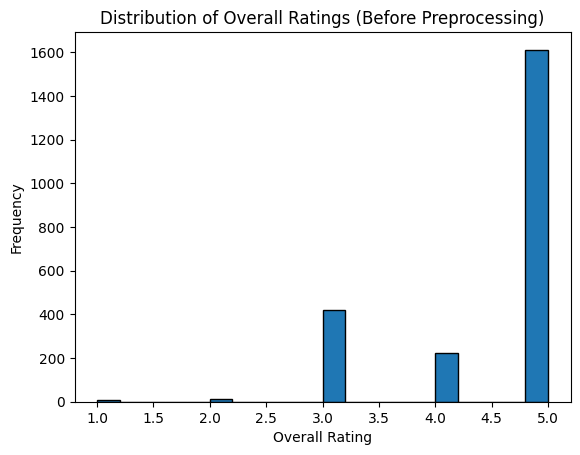

In [13]:
# Check for outliers in the 'overall' rating column

"""
# Check for outliers in the 'overall' rating column
plt.boxplot(df['overall'])
plt.title("Boxplot of Overall Ratings")
plt.ylabel("Overall Rating")
plt.show()
"""

# Calculate summary statistics for the 'overall' rating column
mean_rating = df['overall'].mean()
median_rating = df['overall'].median()
std_dev_rating = df['overall'].std()

# Print summary statistics
print("Mean Rating:", mean_rating)
print("Median Rating:", median_rating)
print("Standard Deviation of Rating:", std_dev_rating)

# Visualize the distribution of ratings using a histogram
plt.hist(df['overall'], bins=20, edgecolor='black')
plt.title("Distribution of Overall Ratings (Before Preprocessing)")
plt.xlabel("Overall Rating")
plt.ylabel("Frequency")
plt.show()


3. Study the below three Lexicons packages and choose two for model building justify why you chose them:

---

## Valence Aware Dictionary and Sentiment Reasoner (VADER):

VADER is a lexicon and rule-based sentiment analysis tool that is specifically tuned to sentiments expressed in social media. It's designed to work well with short, informal text, making it potentially suitable for analyzing reviews or comments on platforms like Twitter or Facebook.

VADER is known for its high accuracy and out-of-the-box performance without requiring extensive training data. It provides sentiment scores for text input, indicating the positivity, neutrality, and negativity of the sentiment expressed.

Its simplicity and ease of use make it a popular choice for quick sentiment analysis tasks.

#### **VADER** offers high accuracy and is well-suited for analyzing short, informal text like social media posts, which might resemble the style of reviews or comments.

---

## TextBlob:

TextBlob is a Python library for processing textual data, including tasks like part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

TextBlob includes a sentiment analysis module that uses a simple rule-based approach and a pre-trained Naive Bayes classifier. It's based on NLTK and Pattern libraries, offering a straightforward interface for performing sentiment analysis tasks.

TextBlob's sentiment analysis module provides polarity scores for text input, indicating the positivity or negativity of the sentiment expressed.

#### **TextBlob** provides a simple yet effective sentiment analysis module with polarity scores, making it easy to integrate and use in Python projects. It can complement VADER by offering an alternative approach to sentiment analysis, potentially capturing nuances that VADER might miss.

---

In [14]:
#!pip install vaderSentiment
#import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
import pandas as pd
import string
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

ModuleNotFoundError: No module named 'vaderSentiment'

4. Pre-process your text as needed, justify each pre-processing step for each model you chose. (Note: take into account the findings of step #3 above)

In [ ]:
# Preprocessing function for VADER
def preprocess_vader(text):
    # Lowercasing
    text = text.lower()
    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenization
    tokens = word_tokenize(text)
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a string
    text = ' '.join(filtered_tokens)
    return text


def get_sentiment(compound_score):
  if compound_score >= 0.05:
    return 'Positive'
  elif compound_score <= -0.05:
    return 'Negative'
  else:
    return 'Neutral'


# Apply preprocessing to the reviewText column for both models
df['clean_text_vader'] = df['input_text'].apply(preprocess_vader)


# Example usage of preprocessed text with VADER
analyzer = SentimentIntensityAnalyzer()
for text in df['clean_text_vader'].head():
    scores = analyzer.polarity_scores(text)
    print("Text:", text)
    print("Sentiment Scores:", scores)
    print("Sentiment:", get_sentiment(scores['compound']))

Text: like vent well something keep house warmer winter sanded painted color house looks great great product
Sentiment Scores: {'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.9325}
Sentiment: Positive
Text: good item five stars
Sentiment Scores: {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
Sentiment: Positive
Text: fit new lg dryer perfectly five stars
Sentiment Scores: {'neg': 0.0, 'neu': 0.427, 'pos': 0.573, 'compound': 0.7717}
Sentiment: Positive
Text: good value electric dryers perfect size
Sentiment Scores: {'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 0.8402}
Sentiment: Positive
Text: price delivery excellent five stars
Sentiment Scores: {'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.5719}
Sentiment: Positive


In [ ]:
# Preprocessing function for TextBlob
def preprocess_textblob(text):
    # Lowercasing
    text = text.lower()
    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenization (not needed explicitly for TextBlob)
    # Removing stopwords (optional)
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a string
    text = ' '.join(filtered_tokens)
    return text

def get_sentiment_tb(score):
  if score > 0:
    return 'Positive'
  elif score < 0:
    return 'Negative'
  else:
    return 'Neutral'

df['clean_text_textblob'] = df['input_text'].apply(preprocess_textblob)
# Example usage of preprocessed text with TextBlob
for text in df['clean_text_textblob'].head():
    blob = TextBlob(text)
    print("Text:", text)
    print("Sentiment Polarity:", blob.sentiment.polarity)
    print("Sentiment:", get_sentiment_tb(blob.sentiment.polarity))

Text: like vent well something keep house warmer winter sanded painted color house looks great great product
Sentiment Polarity: 0.8
Sentiment: Positive
Text: good item five stars
Sentiment Polarity: 0.7
Sentiment: Positive
Text: fit new lg dryer perfectly five stars
Sentiment Polarity: 0.5121212121212121
Sentiment: Positive
Text: good value electric dryers perfect size
Sentiment Polarity: 0.85
Sentiment: Positive
Text: price delivery excellent five stars
Sentiment Polarity: 1.0
Sentiment: Positive


In [ ]:
#5. Randomly select 1000 reviews from your dataset
# Randomly select 1000 reviews
random_reviews = df.sample(n=1000, random_state=26)

# Display the randomly selected reviews
print(random_reviews.describe())

           overall  unixReviewTime  review_length
count  1000.000000    1.000000e+03    1000.000000
mean      4.520000    1.457816e+09    1485.511000
std       0.813795    5.641038e+07     840.460294
min       1.000000    1.221523e+09       2.000000
25%       4.000000    1.449274e+09     971.000000
50%       5.000000    1.478650e+09    1198.000000
75%       5.000000    1.482278e+09    1864.000000
max       5.000000    1.523923e+09    3932.000000


In [ ]:
# Evaluate sentiment using the 2 models
analyzer = SentimentIntensityAnalyzer()
def get_sentiment_by_vader(text):
  scores = analyzer.polarity_scores(text)
  return get_sentiment(scores['compound'])

def get_sentiment_by_textblob(text):
    blob = TextBlob(text)
    return get_sentiment_tb(blob.sentiment.polarity)

random_reviews['predicted_sentiment_vader'] = random_reviews['clean_text_vader'].apply(lambda text: get_sentiment_by_vader(text))
random_reviews['predicted_sentiment_textblob'] = random_reviews['clean_text_textblob'].apply(lambda text: get_sentiment_by_textblob(text))
random_reviews['predicted_sentiment_vader_raw'] = random_reviews['input_text'].apply(lambda text: get_sentiment_by_vader(text))
random_reviews['predicted_sentiment_textblob_raw'] = random_reviews['input_text'].apply(lambda text: get_sentiment_by_textblob(text))
print(random_reviews[['overall', 'label', 'predicted_sentiment_textblob', 'predicted_sentiment_vader']].head())

      overall     label predicted_sentiment_textblob predicted_sentiment_vader
268         5  Positive                     Positive                  Positive
1040        3   Neutral                     Positive                  Positive
1735        5  Positive                     Positive                  Positive
2009        5  Positive                     Positive                  Positive
1615        5  Positive                     Positive                  Positive


In [ ]:
print("Prediction Distribution for label:")
print(random_reviews['label'].value_counts())
print("Prediction Distribution for VADER:")
print(random_reviews['predicted_sentiment_vader'].value_counts())
print('-'*50)
print("Prediction Distribution for TextBlob:")
print(random_reviews['predicted_sentiment_textblob'].value_counts())

Prediction Distribution for label:
Positive    823
Neutral     170
Negative      7
Name: label, dtype: int64
Prediction Distribution for VADER:
Positive    986
Neutral      10
Negative      4
Name: predicted_sentiment_vader, dtype: int64
--------------------------------------------------
Prediction Distribution for TextBlob:
Positive    986
Neutral      12
Negative      2
Name: predicted_sentiment_textblob, dtype: int64


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Define a function to evaluate the models
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    report = classification_report(y_true, y_pred, output_dict=True)
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Classification Report:")
    print(report)
    return report

# Generate classification reports for both models
# Check Performance of Vader
print('-'*100)
print('VADER Model Performance:')
print('-'*50)
print('Preprocessed')
report_vader = evaluate_model(random_reviews['label'], random_reviews['predicted_sentiment_vader'])
print('-'*50)
print('Raw')
report_vader_raw = evaluate_model(random_reviews['label'], random_reviews['predicted_sentiment_vader_raw'])
print('-'*100)
print('\n\n')
# Check Performance of TextBlob
print('-'*100)
print('TextBlob Model Performance:')
print('-'*50)
print('Preprocessed')
report_textblob = evaluate_model(random_reviews['label'], random_reviews['predicted_sentiment_textblob'])
print('-'*50)
print('Raw')
report_textblob_raw = evaluate_model(random_reviews['label'], random_reviews['predicted_sentiment_textblob_raw'])
print('-'*100)


----------------------------------------------------------------------------------------------------
VADER Model Performance:
--------------------------------------------------
Preprocessed
Accuracy: 0.813
F1 Score: 0.7401074425850542
Classification Report:
{'Negative': {'precision': 0.25, 'recall': 0.14285714285714285, 'f1-score': 0.18181818181818182, 'support': 7}, 'Neutral': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 170}, 'Positive': {'precision': 0.8235294117647058, 'recall': 0.9866342648845686, 'f1-score': 0.8977335544499722, 'support': 823}, 'accuracy': 0.813, 'macro avg': {'precision': 0.35784313725490197, 'recall': 0.3764971359139038, 'f1-score': 0.3598505787560513, 'support': 1000}, 'weighted avg': {'precision': 0.679514705882353, 'recall': 0.813, 'f1-score': 0.7401074425850542, 'support': 1000}}
--------------------------------------------------
Raw
Accuracy: 0.813
F1 Score: 0.7401074425850542
Classification Report:
{'Negative': {'precision': 0.25, 'recall

In [ ]:
# Extract performance metrics
accuracy_vader = report_vader['accuracy']
accuracy_vader_raw = report_vader_raw['accuracy']
accuracy_textblob = report_textblob['accuracy']
accuracy_textblob_raw = report_textblob_raw['accuracy']

precision_vader = report_vader['weighted avg']['precision']
precision_vader_raw = report_vader_raw['weighted avg']['precision']
precision_textblob = report_textblob['weighted avg']['precision']
precision_textblob_raw = report_textblob_raw['weighted avg']['precision']

recall_vader = report_vader['weighted avg']['recall']
recall_vader_raw = report_vader_raw['weighted avg']['recall']
recall_textblob = report_textblob['weighted avg']['recall']
recall_textblob_raw = report_textblob_raw['weighted avg']['recall']

f1_score_vader = report_vader['weighted avg']['f1-score']
f1_score_vader_raw = report_vader_raw['weighted avg']['f1-score']
f1_score_textblob = report_textblob['weighted avg']['f1-score']
f1_score_textblob_raw = report_textblob_raw['weighted avg']['f1-score']

# Create a comparison table
comparison_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'VADER (preprocessed)': [accuracy_vader, precision_vader, recall_vader, f1_score_vader],
    'VADER (raw)': [accuracy_vader_raw, precision_vader_raw, recall_vader_raw, f1_score_vader_raw],
    'TextBlob (preprocessed)': [accuracy_textblob, precision_textblob, recall_textblob, f1_score_textblob],
    'TextBlob (raw)': [accuracy_textblob_raw, precision_textblob_raw, recall_textblob_raw, f1_score_textblob_raw]
})

# Print the comparison table
print(comparison_table)

      Metric  VADER (preprocessed)  VADER (raw)  TextBlob (preprocessed)  \
0   Accuracy              0.813000     0.813000                 0.810000   
1  Precision              0.679515     0.679515                 0.676095   
2     Recall              0.813000     0.813000                 0.810000   
3   F1-Score              0.740107     0.740107                 0.737015   

   TextBlob (raw)  
0         0.81100  
1         0.67556  
2         0.81100  
3         0.73711  
